In [75]:
from sklearn.model_selection import train_test_split
import pandas as pd

file_path = './diabetes.csv'

X_full = pd.read_csv(file_path)

num_true = len(X_full.loc[X_full['Outcome'] ==1])
print(num_true)
num_false = len(X_full.loc[X_full['Outcome'] ==0])
print(num_false)

X_full.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

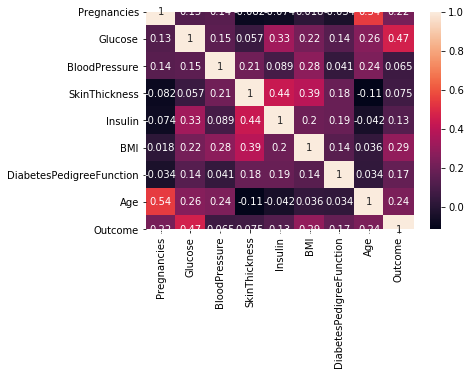

In [66]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt # plotting
import numpy as np #
import os 

corrMatrix = X_full.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

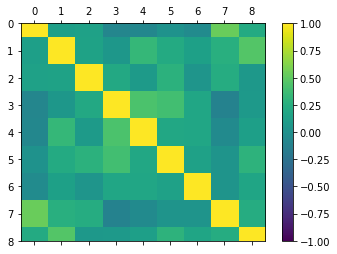

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corrMatrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

plt.show()

In [44]:
y=X_full['Outcome']
del(X_full['Outcome'])

In [45]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [47]:
cols_with_missing=[col for col in X_full.columns if X_full[col].isnull().any()]
print(cols_with_missing)

[]


In [48]:
s = (X_full.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)


Categorical variables:
[]


In [49]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=0.7,random_state=40)
model.fit(X_train,y_train)

C:\Users\Amal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
preds=model.predict(X_valid)

In [85]:
from sklearn import metrics
print(metrics.accuracy_score(y_valid,preds))

0.8181818181818182


In [86]:
from sklearn import metrics  
print( metrics.confusion_matrix(y_valid,preds))
#TN FP
#FN TP

[[98  9]
 [19 28]]


In [87]:
print(metrics.classification_report(y_valid,preds))


              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [88]:
from sklearn import svm

clf = svm.SVC(C = 100,gamma= "scale")
clf.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
pred=clf.predict(X_valid)

In [90]:
print(metrics.accuracy_score(y_valid,pred))

0.8181818181818182


In [108]:
from sklearn.ensemble import RandomForestClassifier
Mymodel= RandomForestClassifier(random_state=0, n_estimators=300)
Mymodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [109]:
predi=Mymodel.predict(X_valid)

In [110]:
print(metrics.accuracy_score(y_valid,predi))

0.8051948051948052


In [112]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [113]:
Mypred=gnb.predict(X_valid)
print(metrics.accuracy_score(y_valid,Mypred))

0.7922077922077922
